In [6]:
''' Needed libraries '''

import numpy as np # For matrix operations and numerical processing
import matplotlib.pyplot as plt # For plotting
import os, sys # For filepaths
import scipy 

In [7]:
''' Add the datasets and libraries to the system path '''

# Find the path to our implementations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
home_directory = os.path.dirname(parent_directory)
libraries_path = os.path.join(home_directory, 'Libraries')

# Find the path to the datasets
datasets_path = os.path.join(home_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)
sys.path.append(libraries_path)

In [8]:
''' Loading in the dataset and splitting into observations and labels '''

dataset= np.load(os.path.join(datasets_path, 'fashion_train.npy'))  # Load dataset
X = dataset[:, :-1] # Define X as all columns except the last one
y = dataset[:, -1] # Define y as the last column
projection_matrix = np.load(os.path.join(f"{home_directory}/Exported_Data", 'LDA_projection.npy')) # Import projection_matrix from file

In [9]:
from Bayes import Bayes_classifier

In [10]:
x_test = np.array([[0.6,0.5],[0.1,0.2]])
bc = Bayes_classifier(projection_matrix,y, 0.1) # Initialize our Bayes classifier 
# bc.kde(x_test)
# bc.pdf(x_test)
# bc.posterior_prob(x_test)
bc.classify_test_input(x_test)


0
1


[]

# Naive Bayes classifier

Naive Bayes classifier classifies to the class with the highest posterior probablity: 
$$ P(Y=k|x)=\frac{\pi_kf_k(x)}{\sum\limits_{l=1}^K\pi_kf_l(x)}$$

We estimate the class priors, $\pi_k$ using the proportion of training observations in class k $$\pi_k=\frac{\text{n. of observations in class k}}{\text{total n. of observations}}$$

We assume that each feature within each class is independent so: $f_k(x)=f_{k1}(x_1)\cdot ...\cdot f_{kp}(x_p)$
In our case we have 2 features so the density function will look like this: 
$$f_k(x)=f_k(x_1,x_2|y)=f_k(x_1)\cdot f_k(x_2)$$

We estimate each density function $f_k(x_i)$ of a feature $x_i$ in each class $k$ using the Gaussian kernel density estimate

Class priors

In [5]:
# computing class priors 
n = projection_matrix.shape[0]
class_priors = []
for c in np.unique(y):
	outcome_count = sum(y == c)
	class_priors.append(outcome_count / n)

Density functions for each feature for each class $f_k(x_i)$

In [6]:
def kde(data): 
    kde = scipy.stats.gaussian_kde(data)
    return kde 

# example: finding kde for class 1, feautre 1 
C1f1 = projection_matrix[y==1][:,0]
kde(C1f1)

In [7]:
# testing shit 
x = np.array([0.8,0.7])
Class = projection_matrix[y==1]
class_feature = Class[:,1]
scipy.stats.gaussian_kde(class_feature)(x[1])


array([0.04093492])

Now we compute the kde for each feature for each class and find the product for each class to get $$f_k(x_1,x_2|y)=f_k(x_1)\cdot f_k(x_2)$$

In [8]:
def pdf(x, X, y, h, sd=1):
    ''' Returns the product of the kde of each feature for each class i.e. f(x_1,x_2|y) for each class y. '''
    kds = []
    for i in np.unique(y):
        Class = X[y==i]
        class_feature_kde = np.array([])
        for feature in range(Class.shape[1]):
            class_feature = Class[:,feature]
            value = scipy.stats.gaussian_kde(class_feature)(x[feature])
            class_feature_kde = np.append(class_feature_kde, value)
        kds.append(class_feature_kde)
        kds[i]=np.prod(kds[i])  
    return kds  


Posterior probability

Now for each class we use the class prior $\pi_k$ and the pdf estimate $f_k(x_1,x_2|k)$ to compute the posterior probability for each class $$ P(Y=k|x)=\frac{\pi_kf_k(x)}{\sum\limits_{l=1}^K\pi_kf_l(x)}$$

In [6]:
def posterior_prob(x,X,y,h):
    ''' Returns a posterior probability of a test data point x being in each class y. '''
    class_probs = []
    for i in np.unique(y): 
        class_prior = class_priors[i]
        num = class_prior * pdf(x,X,y,h)[i]
        denom = sum(np.multiply(class_priors,pdf(x,X,y,h)))
        class_prob = num / denom
        class_probs.append(class_prob)
    return class_probs

# testing example 
x = np.array([0.8,0.7])

posterior_prob(x,projection_matrix,y,0.1) 

NameError: name 'class_priors' is not defined

In [10]:
kde = []
for c in np.unique(y):
    kde_c =[]
    for feature in range(projection_matrix.shape[1]):
        c_feature_data = projection_matrix[y==c][feature]
        kde_c_feature = scipy.stats.gaussian_kde(c_feature_data)
        kde_c.append(kde_c_feature)
    kde.append(kde_c)


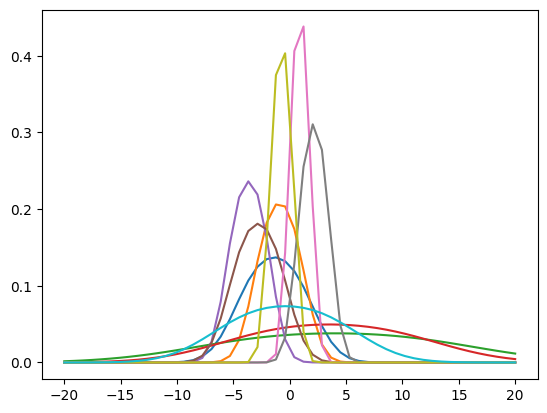

In [11]:
x = np.linspace(-20,20)
for c in np.unique(y):
    for feature in range(projection_matrix.shape[1]):
        kdet=kde[c][feature](x)
        plt.plot(x,kdet)

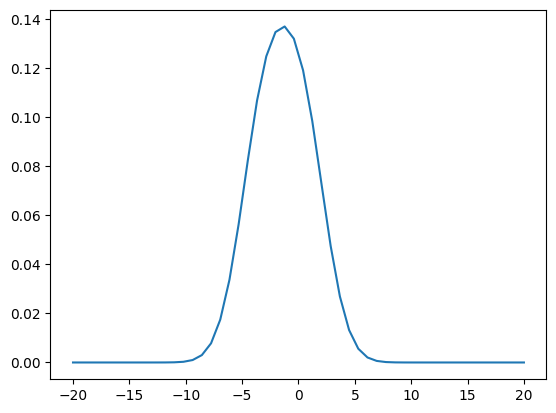

In [12]:
kdet=kde[0][0](x)
plt.plot(x,kdet)

In [22]:
test_0=projection_matrix[3]
print(y[3])

posterior_prob(test_0,projection_matrix,y,0.1)

3


[0.4840405229843173,
 0.0016400368625874282,
 0.002785703499326198,
 0.457309433565946,
 0.05422430308782303]

In [8]:
np.multiply([1,2,3],[8,1,2])
np.argmax([1,2,3]) 

2